<a href="https://colab.research.google.com/github/rajatgupta3121/Rajat_gupta_143/blob/main/RecommendationSysytem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing all mandoatory libraries for machine learning model

In [ ]:

import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns

 **Loading the datasets - movies and ratings which will help to develop the model**

In [ ]:
movies = pd.read_csv('/content/movies.csv')
ratings = pd.read_csv('/content/ratings.csv')

In [ ]:
print(ratings.head())

   userId  movieId  rating    timestamp
0       1        1     4.0  964982703.0
1       1        3     4.0  964981247.0
2       1        6     4.0  964982224.0
3       1       47     5.0  964983815.0
4       1       50     5.0  964982931.0


In [ ]:
final_dataset = ratings.pivot(index='movieId',columns='userId',values='rating')

In [ ]:
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,279,280,281,282,283,284,285,286,287,288
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,3.0,4.5,NaN,4.5,3.0,NaN,NaN,NaN,NaN,4.5
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,2.0
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


In [ ]:
final_dataset.fillna(0,inplace=True)
print(final_dataset.head())

userId   1    2    3    4    5    6    7    8    9    10   ...  279  280  281  \
movieId                                                    ...                  
1        4.0  0.0  0.0  0.0  4.0  0.0  4.5  0.0  0.0  0.0  ...  3.0  4.5  0.0   
2        0.0  0.0  0.0  0.0  0.0  4.0  0.0  4.0  0.0  0.0  ...  0.0  0.0  0.0   
3        4.0  0.0  0.0  0.0  0.0  5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4        0.0  0.0  0.0  0.0  0.0  3.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
5        0.0  0.0  0.0  0.0  0.0  5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

userId   282  283  284  285  286  287  288  
movieId                                     
1        4.5  3.0  0.0  0.0  0.0  0.0  4.5  
2        0.0  0.0  4.0  0.0  0.0  0.0  2.0  
3        0.0  0.0  0.0  0.0  0.0  0.0  4.0  
4        0.0  0.0  0.0  0.0  0.0  0.0  0.0  
5        0.0  0.0  0.0  0.0  0.0  0.0  2.0  

[5 rows x 288 columns]


In [ ]:
no_user_voted = ratings.groupby('movieId')['rating'].agg('count')


In [ ]:
no_user_voted

movieId
1         107
2          45
3          26
4           5
5          25
         ... 
193579      1
193581      1
193583      1
193585      1
193587      1
Name: rating, Length: 6433, dtype: int64

In [ ]:
no_movies_voted = ratings.groupby('userId')['rating'].agg('count')

In [ ]:
no_movies_voted

userId
1      232
2       29
3       39
4      216
5       44
      ... 
284     88
285     36
286    106
287    152
288    970
Name: rating, Length: 288, dtype: int64

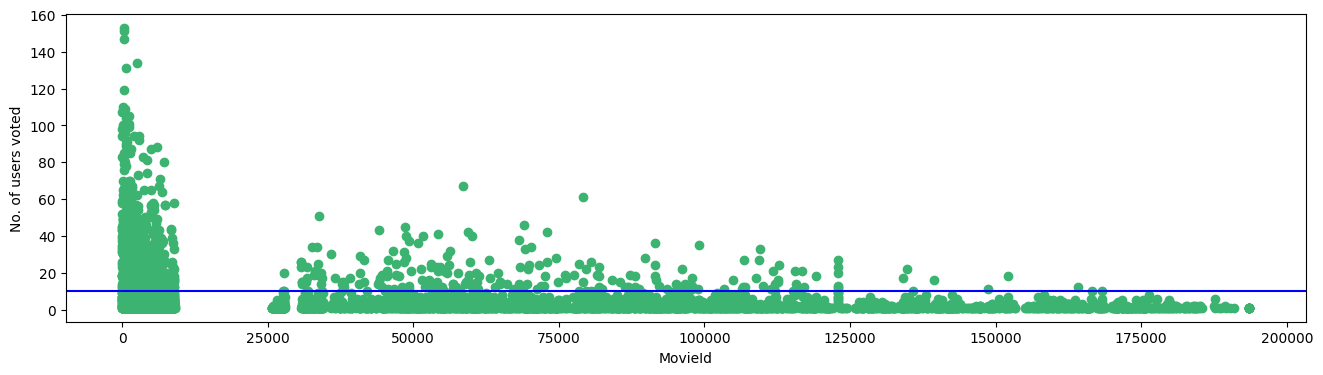

In [ ]:
f,ax = plt.subplots(1,1,figsize=(16,4))
# ratings['rating'].plot(kind='hist')
plt.scatter(no_user_voted.index,no_user_voted,color='mediumseagreen')
plt.axhline(y=10,color='b')
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')
plt.show()

In [ ]:
final_dataset = final_dataset.loc[no_user_voted[no_user_voted > 10].index,:]

In [ ]:
final_dataset

userId,1,2,3,4,5,6,7,8,9,10,...,279,280,281,282,283,284,285,286,287,288
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,3.0,4.5,0.0,4.5,3.0,0.0,0.0,0.0,0.0,4.5
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,2.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
6,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,4.5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
139385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0
148626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


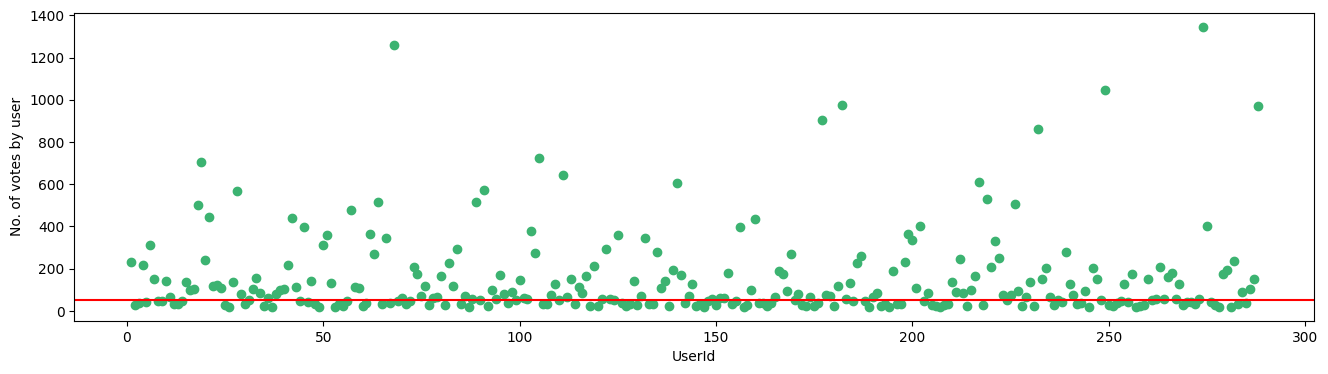

In [ ]:
f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_movies_voted.index,no_movies_voted,color='mediumseagreen')
plt.axhline(y=50,color='r')
plt.xlabel('UserId')
plt.ylabel('No. of votes by user')
plt.show()

In [ ]:
final_dataset=final_dataset.loc[:,no_movies_voted[no_movies_voted > 50].index]
final_dataset

userId,1,4,6,7,10,11,15,16,17,18,...,273,274,275,279,280,282,284,286,287,288
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,4.5,0.0,0.0,2.5,0.0,4.5,3.5,...,5.0,4.0,5.0,3.0,4.5,4.5,0.0,0.0,0.0,4.5
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,3.5,0.0,0.0,0.0,0.0,4.0,0.0,0.0,2.0
3,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
6,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,4.0,...,0.0,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134853,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,3.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
139385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,...,0.0,0.0,0.0,5.0,0.0,4.5,0.0,0.0,0.0,0.0
148626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
csr_data = csr_matrix(final_dataset.values)
final_dataset.reset_index(inplace=True)

In [ ]:
final_dataset

userId,movieId,1,4,6,7,10,11,15,16,17,...,273,274,275,279,280,282,284,286,287,288
0,1,4.0,0.0,0.0,4.5,0.0,0.0,2.5,0.0,4.5,...,5.0,4.0,5.0,3.0,4.5,4.5,0.0,0.0,0.0,4.5
1,2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.5,0.0,0.0,0.0,0.0,4.0,0.0,0.0,2.0
2,3,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
3,5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,6,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,134853,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1074,139385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,4.5,0.0,0.0,0.0,0.0
1075,148626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0
1076,152081,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [ ]:
def get_movie_recommendation(movie_name):
    n_movies_to_reccomend = 10
    movie_list = movies[movies['title'].str.contains(movie_name)]
    if len(movie_list):
        movie_idx= movie_list.iloc[0]['movieId']
        movie_idx = final_dataset[final_dataset['movieId'] == movie_idx].index[0]
        distances , indices = knn.kneighbors(csr_data[movie_idx],n_neighbors=n_movies_to_reccomend+1)
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
        recommend_frame = []
        for val in rec_movie_indices:
            movie_idx = final_dataset.iloc[val[0]]['movieId']
            idx = movies[movies['movieId'] == movie_idx].index
            recommend_frame.append({'Title':movies.iloc[idx]['title'].values[0],'Distance':val[1]})
        df = pd.DataFrame(recommend_frame,index=range(1,n_movies_to_reccomend+1))
        return df
    else:
        return "No movies found. Please check your input"

In [ ]:
get_movie_recommendation("Iron Man")

,Title,Distance
1,Avatar (2009),0.376432
2,Pirates of the Caribbean: Dead Man's Chest (2006),0.375242
3,Lucky Number Slevin (2006),0.369508
4,"Matrix Revolutions, The (2003)",0.357778
5,"Avengers, The (2012)",0.345033
6,Batman Begins (2005),0.337292
7,"Bourne Ultimatum, The (2007)",0.335450
8,Pirates of the Caribbean: At World's End (2007),0.312556
9,Watchmen (2009),0.310896
10,"Dark Knight, The (2008)",0.282547


from matplotlib import pyplot as plt
_df_0['Distance'].plot(kind='hist', bins=20, title='Distance')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Distance'].plot(kind='line', figsize=(8, 4), title='Distance')
plt.gca().spines[['top', 'right']].set_visible(False)

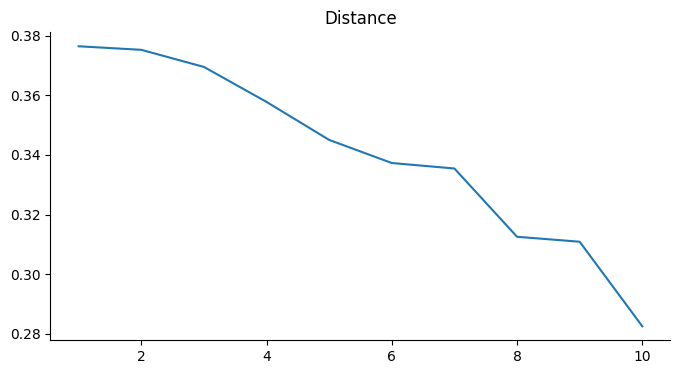

In [ ]:
from matplotlib import pyplot as plt
_df_1['Distance'].plot(kind='line', figsize=(8, 4), title='Distance')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
get_movie_recommendation("Hangover")

,Title,Distance
1,Avatar (2009),0.362801
2,"Social Network, The (2010)",0.360162
3,"Dark Knight, The (2008)",0.351272
4,"Departed, The (2006)",0.347747
5,Django Unchained (2012),0.339637
6,Up (2009),0.336812
7,Zombieland (2009),0.335582
8,Shutter Island (2010),0.296444
9,Inception (2010),0.277656
10,Sherlock Holmes (2009),0.242598


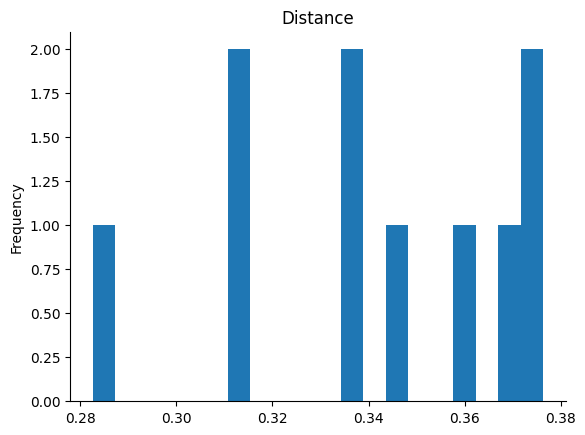

In [ ]:
from matplotlib import pyplot as plt
_df_0['Distance'].plot(kind='hist', bins=20, title='Distance')
plt.gca().spines[['top', 'right',]].set_visible(False)